# Project Overview: Food Delivery Time Prediction

## Objective
The goal of this project is to predict delivery times for food orders based on various factors such as distance, weather, traffic conditions, and courier experience. This prediction helps optimize delivery operations, improve customer satisfaction, and manage logistics efficiently.

## Dataset
The dataset, sourced from Kaggle, contains 1,000 entries and includes the following key features:

1. **Order_ID**: Unique identifier for each order.
2. **Distance_km**: Distance (in kilometers) between the restaurant and the delivery address.
3. **Weather**: Weather conditions during delivery (e.g., Clear, Rainy, Windy).
4. **Traffic_Level**: Level of traffic (e.g., Low, Medium, High).
5. **Time_of_Day**: Time when the delivery occurred (e.g., Morning, Afternoon, Evening).
6. **Vehicle_Type**: Type of vehicle used by the courier (e.g., Scooter, Bike).
7. **Preparation_Time_min**: Time taken by the restaurant to prepare the order (in minutes).
8. **Courier_Experience_yrs**: Experience of the courier in years.
9. **Delivery_Time_min**: Time taken to complete the delivery (in minutes, target variable).

## Methodology
The project is structured as follows:

1. **Data Loading and Exploration**:
   - Load the dataset.
   - Inspect its structure, handle missing values, and perform exploratory data analysis (EDA).

2. **Data Preprocessing**:
   - Encode categorical variables (e.g., Weather, Traffic_Level, Vehicle_Type).
   - Scale numerical features to standardize data.
   - Handle missing values appropriately.

3. **Feature Engineering**:
   - Extract relevant insights or derive new features to improve model performance.

4. **Model Building and Evaluation**:
   - Train machine learning models (e.g., Linear Regression, Decision Trees, Random Forest).
   - Evaluate models using metrics like Mean Absolute Error (MAE) and R-squared.

5. **Insights and Optimization**:
   - Interpret model results to identify key factors affecting delivery time.
   - Propose actionable recommendations for optimizing delivery efficiency.

## Tools and Libraries
The project utilizes the following tools:
- **Python**: Primary programming language.
- **Pandas and NumPy**: Data manipulation and analysis.
- **Matplotlib and Seaborn**: Data visualization.
- **Scikit-learn**: Machine learning algorithms and preprocessing.
- **Jupyter Notebook**: Interactive coding environment.

## Expected Outcomes
- A robust machine learning model capable of accurately predicting delivery times.
- Key insights into factors influencing delivery efficiency.
- Actionable recommendations for logistics optimization.



## Data Loading

First, we will load the dataset and inspect its structure.

In [1]:
import pandas as pd

df = pd.read_csv('Dataset.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Data Understanding

Let's understand the structure of the dataset by looking at the data types, summary statistics, and any missing values.


In [2]:
# Get information about the dataset
df.info()

# Get summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

### Comparing Variables Against the Target Variable

In this step, we compare all the variables in the dataset with the target variable (`Delivery_Time_min`). This helps us understand how each feature might impact the target variable and identify important relationships.

#### 1. Visualizing Continuous Variables Against the Target Variable

We use scatter plots to visualize the relationship between continuous variables (e.g., `Distance_km`, `Preparation_Time_min`, `Courier_Experience_yrs`) and the target variable `Delivery_Time_min`. These visualizations help identify potential trends or patterns in the data that might influence delivery time.

#### 2. Visualizing Categorical Variables Against the Target Variable

We visualize the relationship between categorical variables (e.g., `Weather`, `Traffic_Level`, `Time_of_Day`, `Vehicle_Type`) and the target variable using box plots. These plots show how the distribution of `Delivery_Time_min` varies across different categories in each categorical variable.

#### 3. Checking Correlations Between Numerical Features and the Target Variable

We compute and visualize the correlation matrix between numerical features (such as `Distance_km`, `Preparation_Time_min`, and `Courier_Experience_yrs`) and the target variable `Delivery_Time_min`. This analysis helps to identify which numerical features have the strongest linear relationships with the target variable.

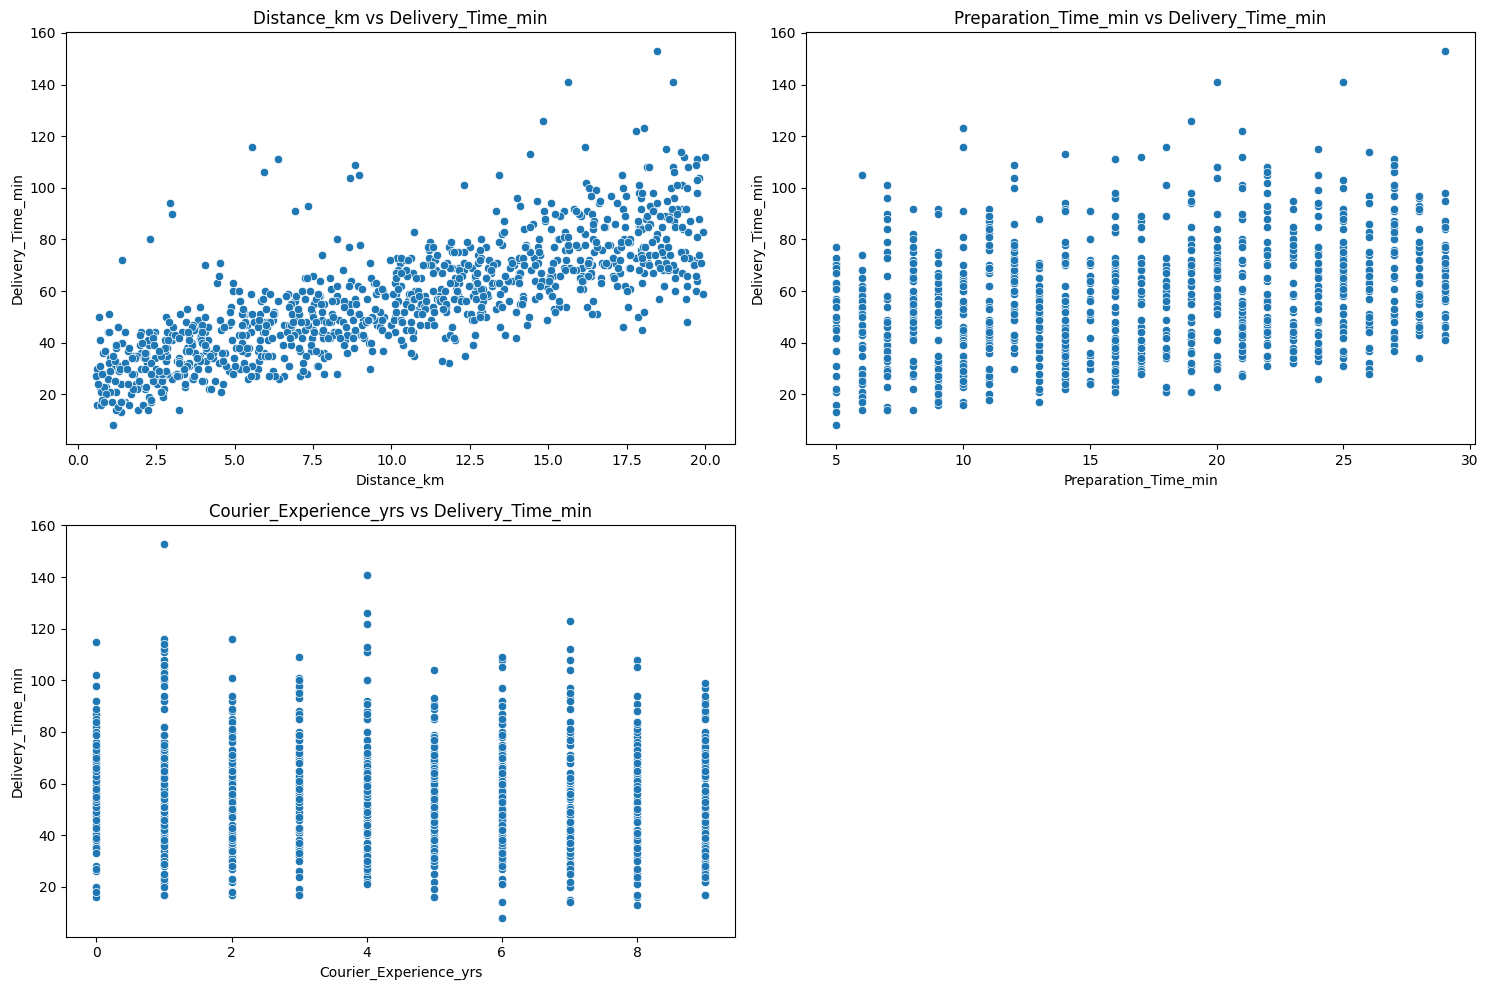

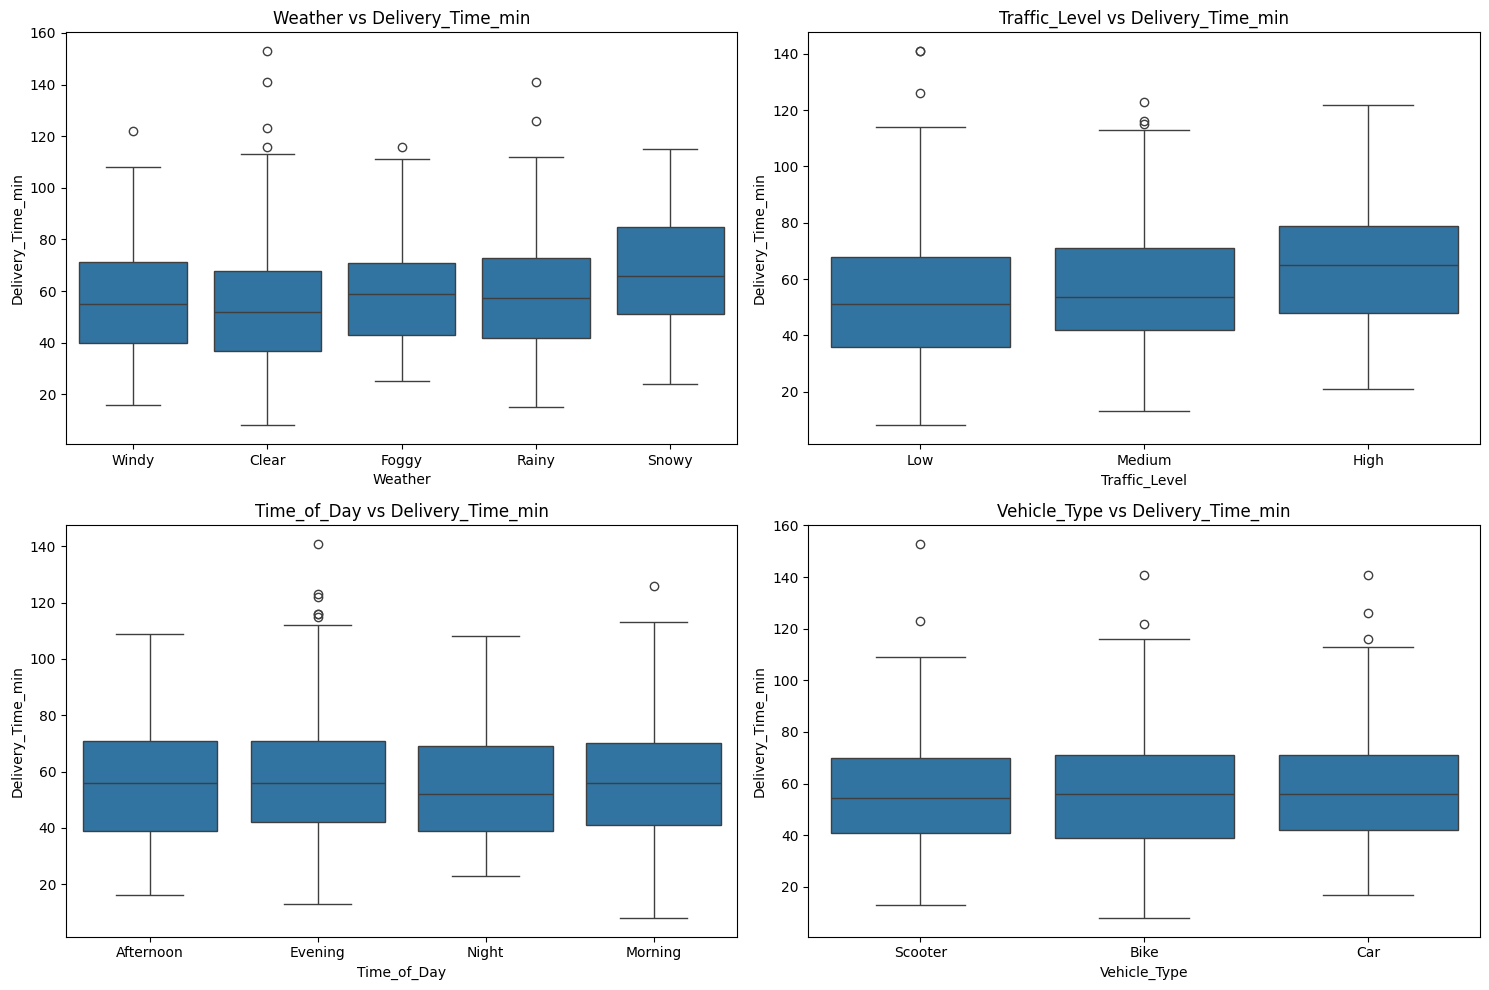

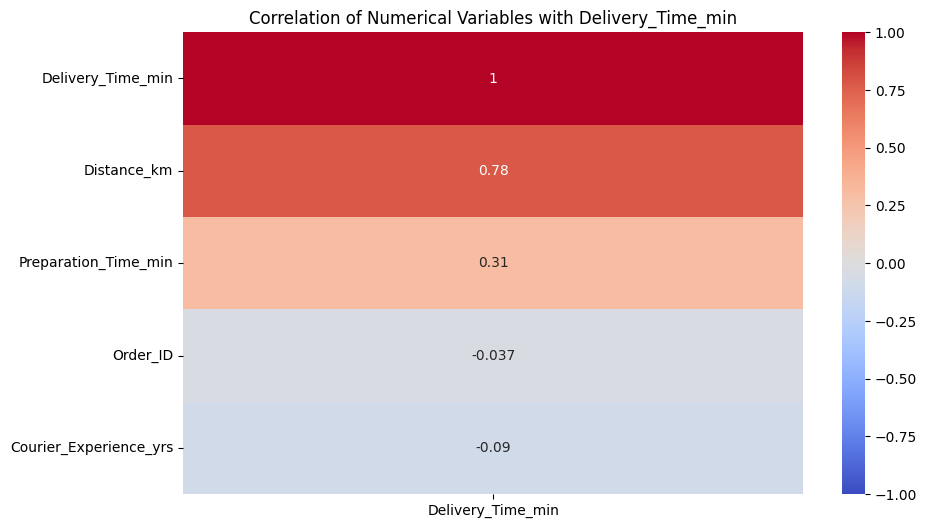

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of all continuous variables to compare
continuous_vars = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

# Visualizing continuous variables against the target variable 'Delivery_Time_min'
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=var, y='Delivery_Time_min')  # Scatter plot for continuous variables
    plt.title(f'{var} vs Delivery_Time_min')

plt.tight_layout()
plt.show()

# List of all categorical variables to compare
categorical_vars = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Visualizing categorical variables against the target variable 'Delivery_Time_min'
plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=var, y='Delivery_Time_min')  # Box plot for categorical variables
    plt.title(f'{var} vs Delivery_Time_min')

plt.tight_layout()
plt.show()

# Select only the numerical columns for correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlations between numerical features and the target variable
correlation_matrix = df[numerical_cols].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Delivery_Time_min']].sort_values(by='Delivery_Time_min', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Numerical Variables with Delivery_Time_min')
plt.show()


In this step, we aim to compare all the variables in the dataset to the target variable (Delivery_Time_min) to identify which variables have the most impact on it.

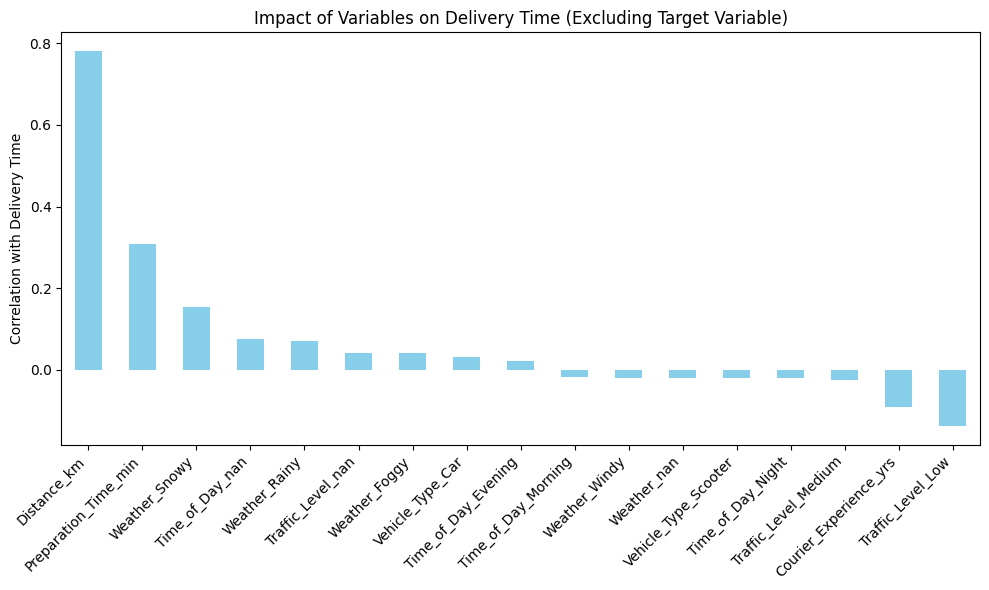

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# 1. Encoding categorical variables
categorical_vars = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected parameter name

# Applying encoding
encoded_categorical_vars = encoder.fit_transform(df[categorical_vars])

# Create a DataFrame for the encoded variables
encoded_df = pd.DataFrame(encoded_categorical_vars, columns=encoder.get_feature_names_out(categorical_vars))

# Append the encoded variables to the original DataFrame (excluding the target variable and Order_ID)
df_encoded = pd.concat([df.drop(columns=categorical_vars + ['Order_ID']), encoded_df], axis=1)

# 2. Compute correlation for all numerical columns excluding 'Delivery_Time_min'
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded_without_target = df_encoded.drop(columns=['Delivery_Time_min'])  # Drop the target variable
correlation_with_target = df_encoded_without_target.corrwith(df['Delivery_Time_min']).sort_values(ascending=False)

# 3. Plotting the bar chart
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Impact of Variables on Delivery Time (Excluding Target Variable)')
plt.ylabel('Correlation with Delivery Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### Weather Conditions
Weather conditions play a crucial role in delivery times. Below is a bar plot showing the distribution of weather conditions. The most frequent value will help us decide how to impute missing data in this column.


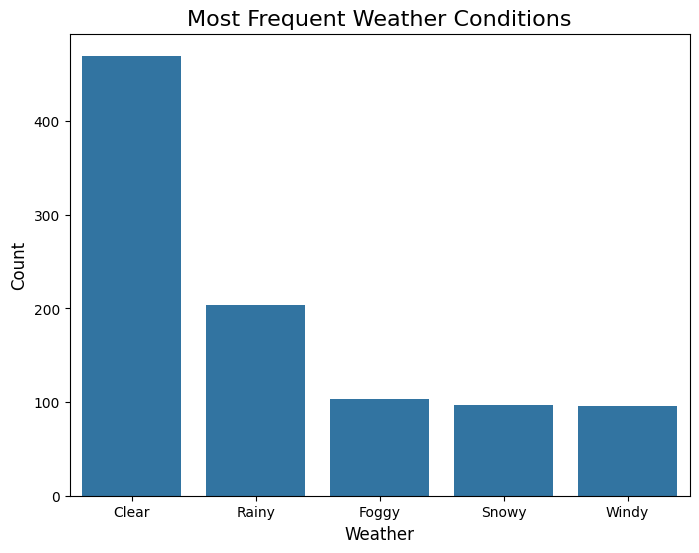

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weather', order=df['Weather'].value_counts().index)
plt.title('Most Frequent Weather Conditions', fontsize=16)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


#### Traffic Levels
Traffic levels significantly impact delivery times. The following bar plot shows the distribution of traffic levels, helping us determine the most frequent value to use for imputation.

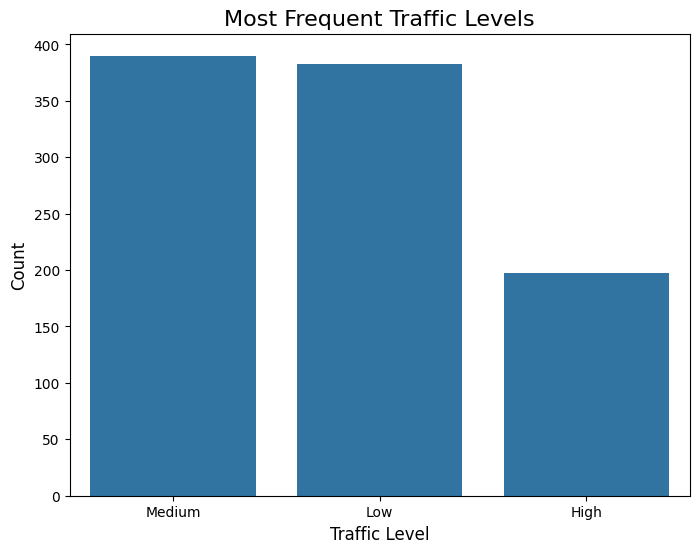

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Traffic_Level', order=df['Traffic_Level'].value_counts().index)
plt.title('Most Frequent Traffic Levels', fontsize=16)
plt.xlabel('Traffic Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Time of Day
The time of day when deliveries occur can affect traffic and delivery times. The chart below shows the distribution of deliveries across different times of day. We'll use this data to decide on the best imputation strategy.

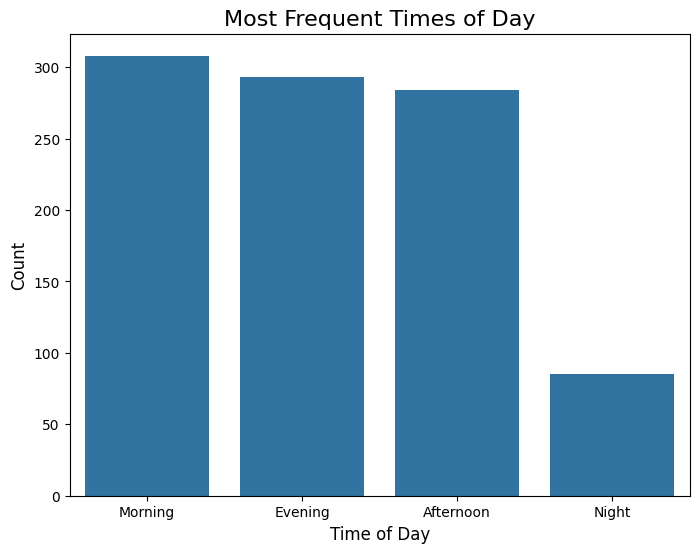

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Time_of_Day', order=df['Time_of_Day'].value_counts().index)
plt.title('Most Frequent Times of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


#### Courier Experience
Courier experience (in years) is a numeric variable that can influence delivery times. The histogram below shows its distribution. Since it's numeric, we will likely use the median or a similar measure for imputing missing values.

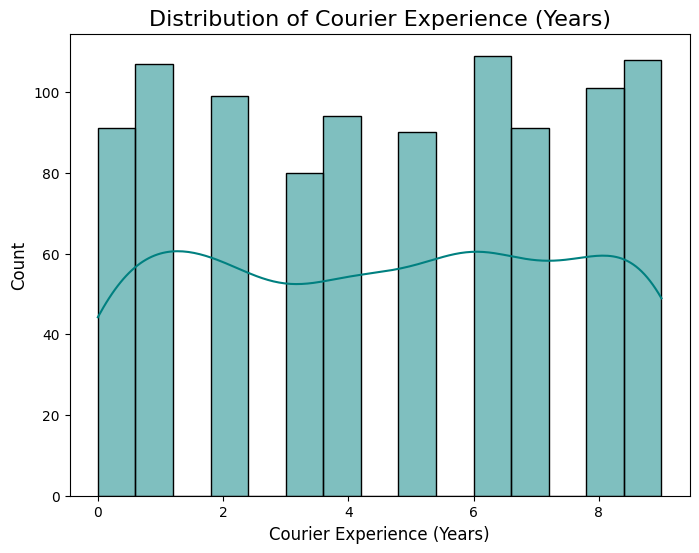

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Courier_Experience_yrs', bins=15, kde=True, color='teal')
plt.title('Distribution of Courier Experience (Years)', fontsize=16)
plt.xlabel('Courier Experience (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### Replacing Missing Values

To handle missing data, we will replace the missing values in the dataset using the most frequent value (mode) for categorical columns and the median for the numerical column. This strategy helps ensure that we do not lose data while filling in missing values with the most appropriate replacements.

---

#### **Imputing Categorical Columns**
For categorical columns (`Weather`, `Traffic_Level`, and `Time_of_Day`), we will replace the missing values with the most frequent value (mode) in each column. This is a common approach when the missing data is believed to be missing at random and does not affect the underlying distribution significantly.

#### **Imputing the Numerical Column**
For the numerical column (`Courier_Experience_yrs`), we will replace missing values with the median. The median is chosen because it is less sensitive to outliers compared to the mean.

#### **Creating Missing Value Indicators**
We will also create new binary columns that indicate whether a value was missing in the original dataset. These indicators can be useful for some machine learning models.


In [9]:
from sklearn.impute import SimpleImputer

# 1. Impute categorical columns with the most frequent value (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')

df['Weather'] = mode_imputer.fit_transform(df[['Weather']]).ravel()
df['Traffic_Level'] = mode_imputer.fit_transform(df[['Traffic_Level']]).ravel()
df['Time_of_Day'] = mode_imputer.fit_transform(df[['Time_of_Day']]).ravel()

# 2. Impute numerical column with the median
median_imputer = SimpleImputer(strategy='median')

df['Courier_Experience_yrs'] = median_imputer.fit_transform(df[['Courier_Experience_yrs']]).ravel()

# 3. Optional: Add missing value indicators for analysis or advanced modeling
df['Is_Weather_Missing'] = df['Weather'].isnull().astype(int)
df['Is_Traffic_Level_Missing'] = df['Traffic_Level'].isnull().astype(int)
df['Is_Time_of_Day_Missing'] = df['Time_of_Day'].isnull().astype(int)
df['Is_Courier_Experience_Missing'] = df['Courier_Experience_yrs'].isnull().astype(int)

# Check if all missing values are handled
print(df.isnull().sum())


Order_ID                         0
Distance_km                      0
Weather                          0
Traffic_Level                    0
Time_of_Day                      0
Vehicle_Type                     0
Preparation_Time_min             0
Courier_Experience_yrs           0
Delivery_Time_min                0
Is_Weather_Missing               0
Is_Traffic_Level_Missing         0
Is_Time_of_Day_Missing           0
Is_Courier_Experience_Missing    0
dtype: int64


### Exploratory Data Analysis (EDA)

In this step, we'll perform some exploratory data analysis to better understand the distribution of our features and their relationship with the target variable, `Delivery_Time_min`. We'll begin by visualizing the distribution of numerical features, followed by an exploration of the relationships between different features and the target.

---

#### 2.1: Distribution of Delivery Time

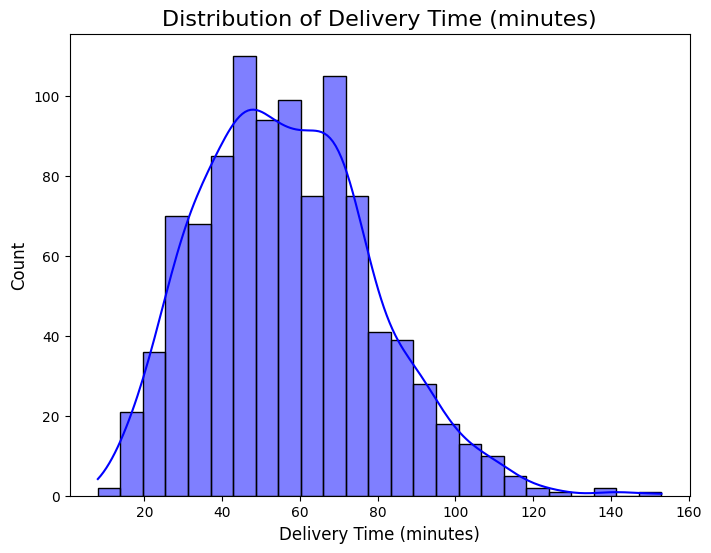

In [10]:
# Distribution of Delivery Time
plt.figure(figsize=(8, 6))
sns.histplot(df['Delivery_Time_min'], kde=True, color='blue')
plt.title('Distribution of Delivery Time (minutes)', fontsize=16)
plt.xlabel('Delivery Time (minutes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### 2.2: Relationship Between Courier Experience and Delivery Time

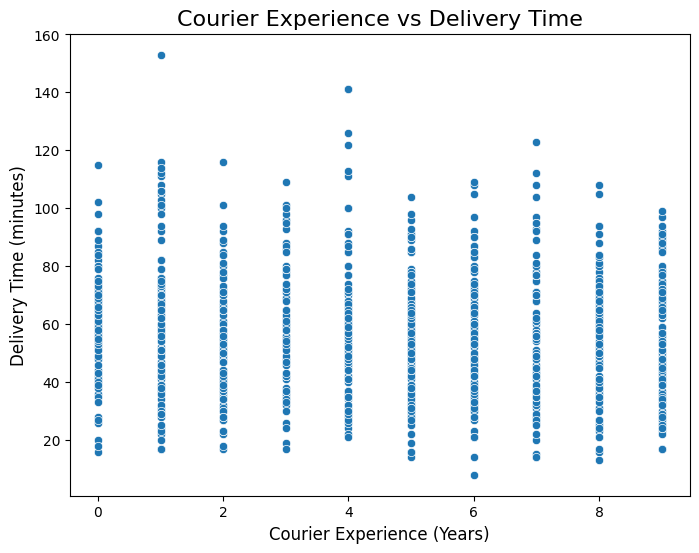

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Courier_Experience_yrs', y='Delivery_Time_min')
plt.title('Courier Experience vs Delivery Time', fontsize=16)
plt.xlabel('Courier Experience (Years)', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.show()

#### 2.3: Relationship Between Distance and Delivery Time

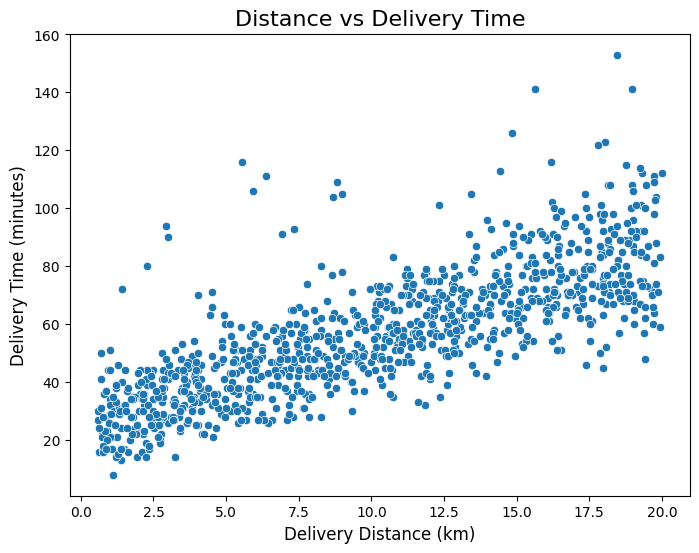

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time_min')
plt.title('Distance vs Delivery Time', fontsize=16)
plt.xlabel('Delivery Distance (km)', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.show()

### Comparing Variables After Imputing Missing Values

After filling in the missing values in the dataset with the most frequent values (mode), we will repeat the comparison of all variables against the target variable (`Delivery_Time_min`). This will allow us to observe any changes in the relationships between the features and the target variable after handling the missing data.

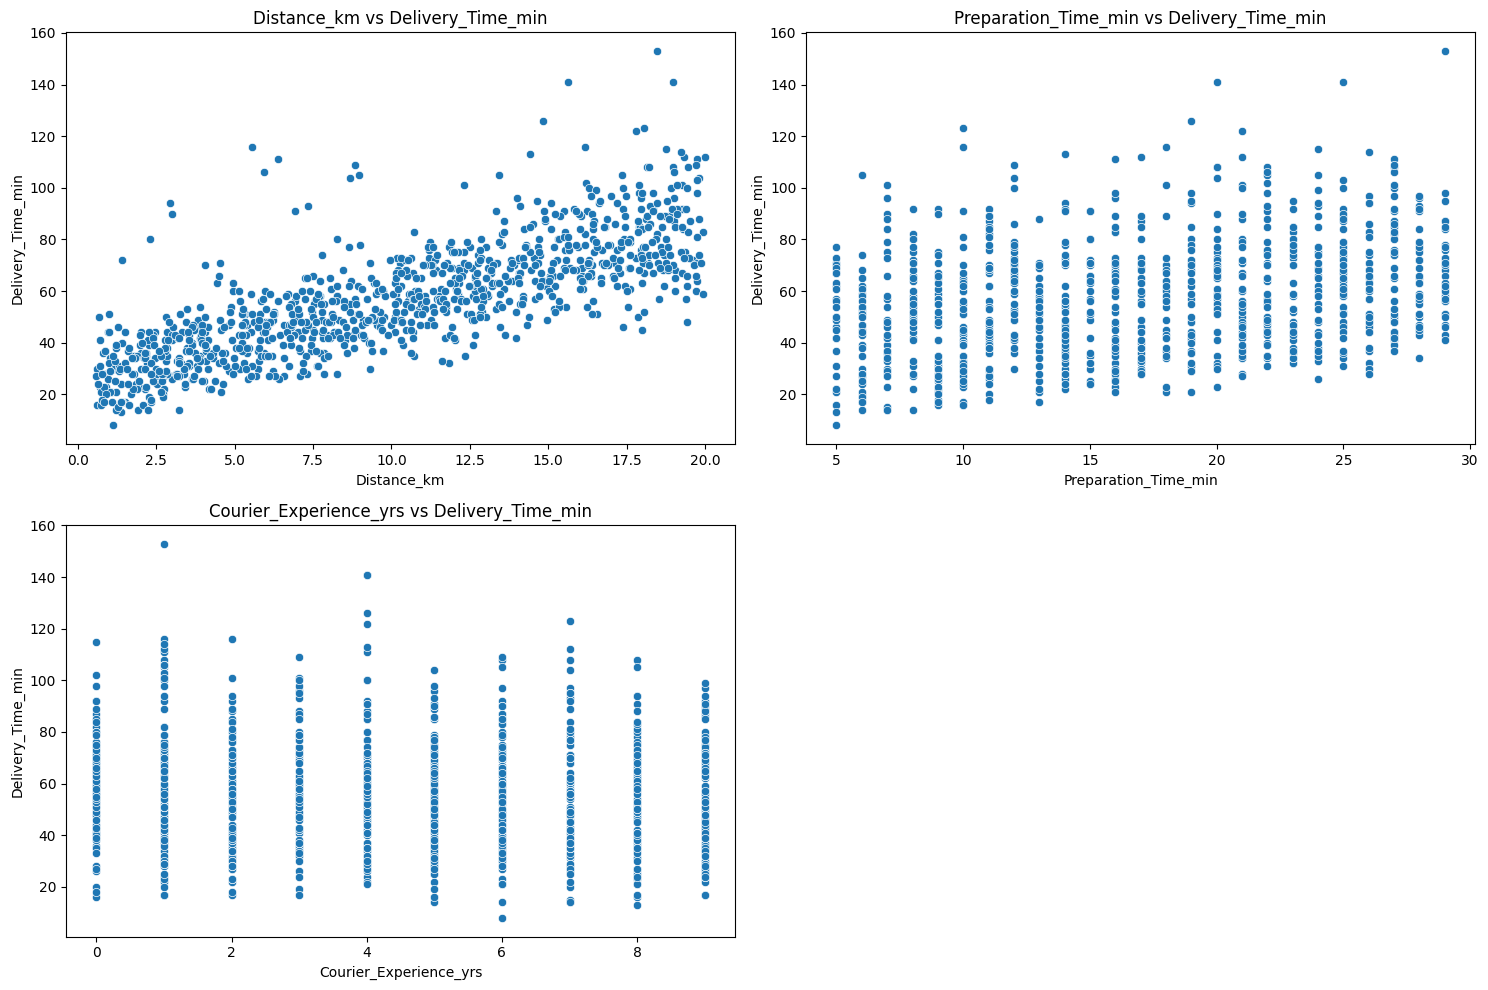

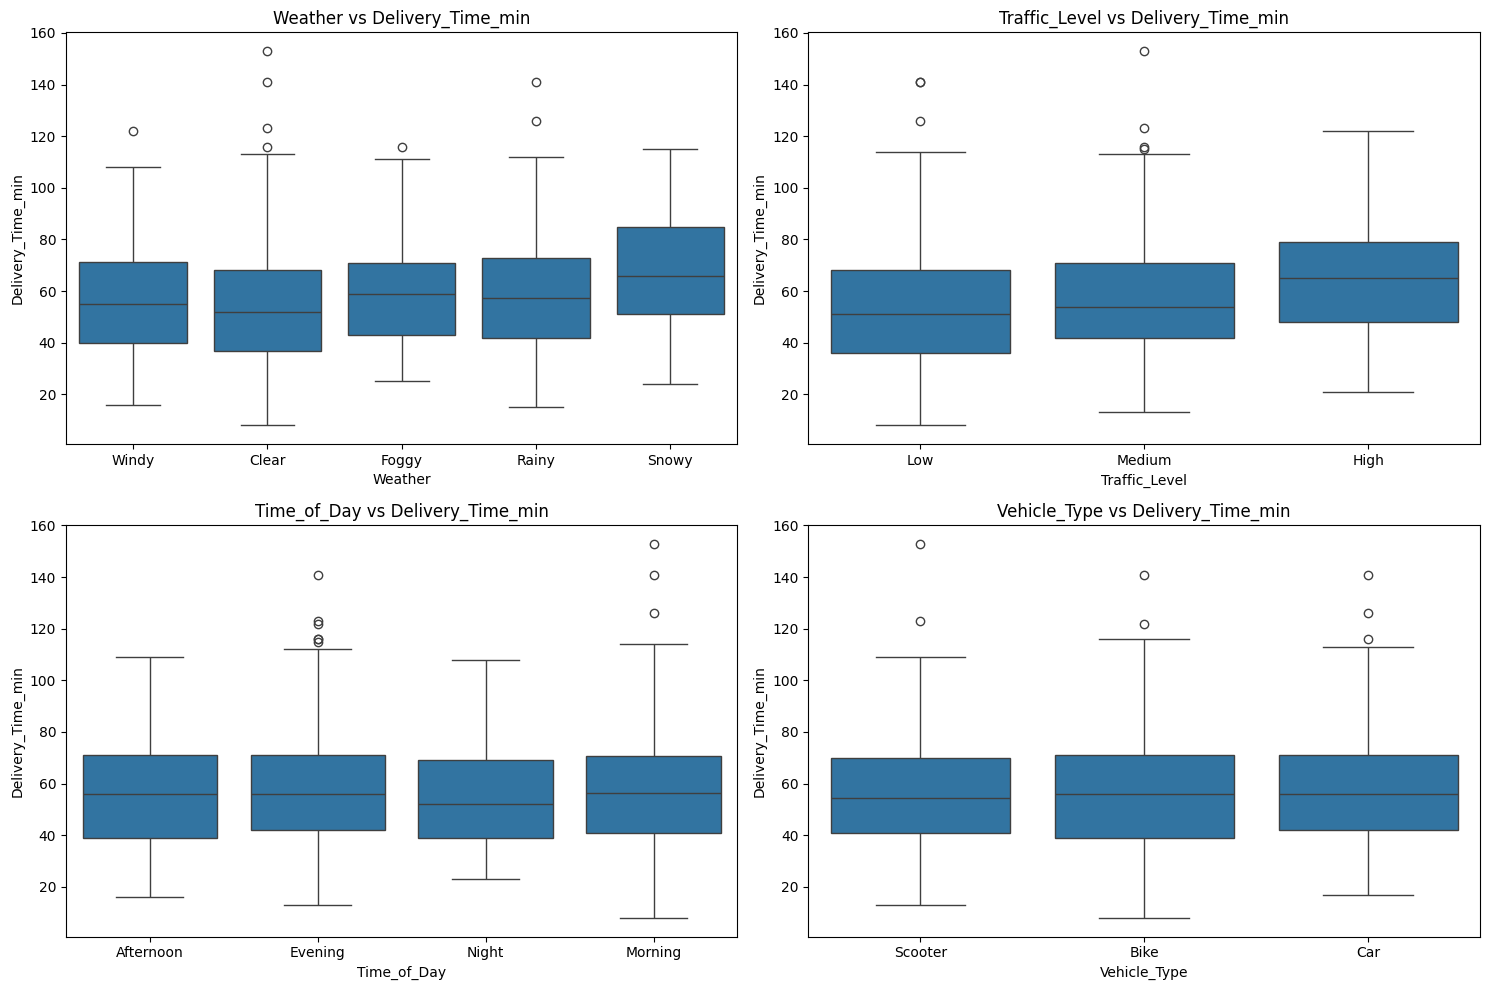

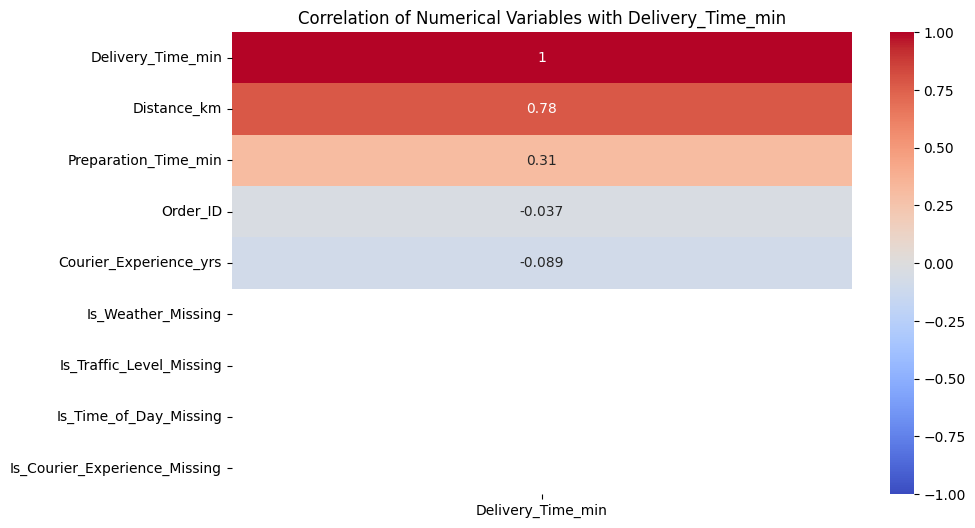

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of all continuous variables to compare
continuous_vars = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

# Visualizing continuous variables against the target variable 'Delivery_Time_min'
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=var, y='Delivery_Time_min')  # Scatter plot for continuous variables
    plt.title(f'{var} vs Delivery_Time_min')

plt.tight_layout()
plt.show()

# List of all categorical variables to compare
categorical_vars = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Visualizing categorical variables against the target variable 'Delivery_Time_min'
plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=var, y='Delivery_Time_min')  # Box plot for categorical variables
    plt.title(f'{var} vs Delivery_Time_min')

plt.tight_layout()
plt.show()

# Select only the numerical columns for correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlations between numerical features and the target variable
correlation_matrix = df[numerical_cols].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Delivery_Time_min']].sort_values(by='Delivery_Time_min', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Numerical Variables with Delivery_Time_min')
plt.show()


In this step, we compare all the variables in the dataset to the target variable (Delivery_Time_min) after handling the missing values. This helps us identify any changes in the relationships and assess which variables have the most impact on the target.

C:\Users\User SC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User SC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


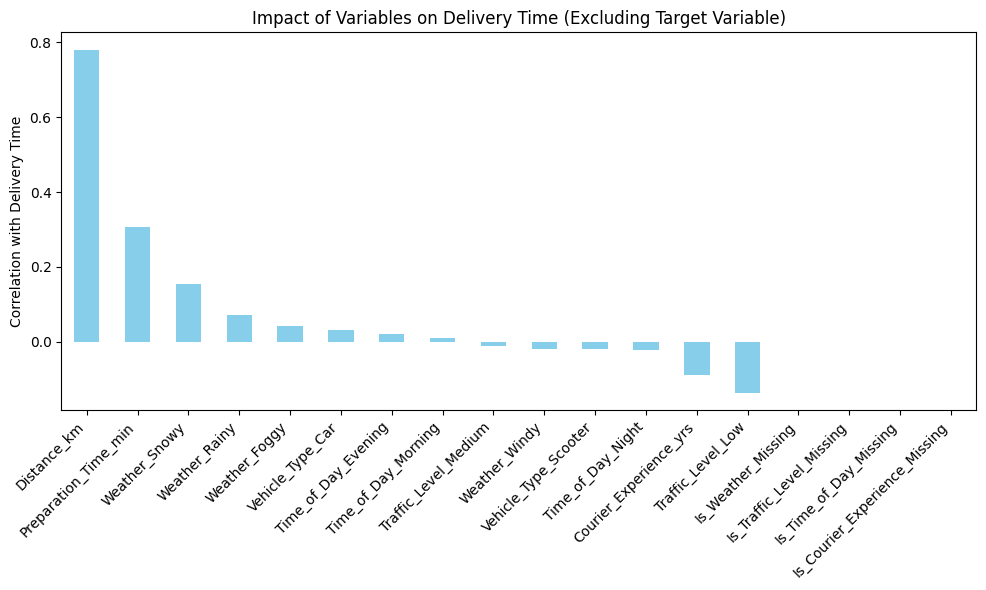

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# 1. Encoding categorical variables
categorical_vars = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected parameter name

# Applying encoding
encoded_categorical_vars = encoder.fit_transform(df[categorical_vars])

# Create a DataFrame for the encoded variables
encoded_df = pd.DataFrame(encoded_categorical_vars, columns=encoder.get_feature_names_out(categorical_vars))

# Append the encoded variables to the original DataFrame (excluding the target variable and Order_ID)
df_encoded = pd.concat([df.drop(columns=categorical_vars + ['Order_ID']), encoded_df], axis=1)

# 2. Compute correlation for all numerical columns excluding 'Delivery_Time_min'
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded_without_target = df_encoded.drop(columns=['Delivery_Time_min'])  # Drop the target variable
correlation_with_target = df_encoded_without_target.corrwith(df['Delivery_Time_min']).sort_values(ascending=False)

# 3. Plotting the bar chart
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Impact of Variables on Delivery Time (Excluding Target Variable)')
plt.ylabel('Correlation with Delivery Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()